# Phân tích các thuộc tính trong bộ dữ liệu
**1. Age (Tuổi):**

* Loại: Số (numeric)
* Đơn vị: Năm

**2. Sex (Giới tính):**

* Loại: Phân loại (categorical)
* Giá trị: M (Nam), F (Nữ)

**3. Chest Pain Type (Loại đau ngực):**

* Loại: Phân loại (categorical)
* Giá trị: TA (Đau thắt ngực điển hình), ATA (Đau thắt ngực không điển hình), NAP (Đau không phải thắt ngực), ASY (Không có triệu chứng).

**4. RestingBP (Huyết áp khi nghỉ ngơi):**

* Loại: Số (numeric)
* Đơn vị: mm Hg

**5. Cholesterol (Cholesterol):**

* Loại: Số (numeric)
* Đơn vị: mmol/l

**6. FastingBS (Đường huyết khi đói):**

* Loại: Phân loại (categorical)
* Giá trị: 1 (nếu FastingBS > 120 mg/dl), 0 (khác).

**7. RestingECG (Kết quả ECG (đo điện tim) khi nghỉ ngơi):**

* Loại: Phân loại (categorical)
* Giá trị: Normal (Bình thường), ST (Có bất thường ST-T), LVH (Phì đại tâm thất trái).

**8. MaxHR (Nhịp tim tối đa):**

* Loại: Số (numeric)
* Đơn vị: Giá trị số giữa 60 và 202

**9. ExerciseAngina (Cơn đau thắt ngực khi tập thể dục):**

* Loại: Phân loại (categorical)
* Giá trị: Y (Có), N (Không).

**10. Oldpeak (Giảm ST):**

* Loại: Số (numeric)
* Đơn vị: Giá trị số đo được tính bằng mức độ giảm.

**11. ST_Slope (Độ dốc của phân đoạn ST):**

* Loại: Phân loại (categorical)
* Sự ảnh hưởng: Độ dốc của phân đoạn ST có thể cho thấy tình trạng tim mạch.

**12. Heart Disease (Bệnh tim):**

* Loại: Kết quả đầu ra (output class)
* Giá trị: 1 (Có bệnh tim), 0 (Bình thường).

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/heart_failure.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [5]:
# Ánh xạ các biến phân loại sang số
df.copy()
df["Sex"] = df["Sex"].map({"M": 0, "F": 1})
df["ChestPainType"] = df["ChestPainType"].map(
    {"TA": 4, "ATA": 3, "NAP": 2, "ASY": 1}
)  # Mã hóa loại đau ngực
df["RestingECG"] = df["RestingECG"].map(
    {"Normal": 0, "ST": 1, "LVH": 2}
)  # Mã hóa kết quả điện tâm đồ
df["ExerciseAngina"] = df["ExerciseAngina"].map(
    {"Y": 1, "N": 0}
)  # Mã hóa cơn đau ngực khi tập thể dục
df["ST_Slope"] = df["ST_Slope"].map({"Up": 1, "Flat": 2, "Down": 3})  # Mã hóa độ dốc ST


df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,3,140,289,0,0,172,0,0.0,1,0
1,49,1,2,160,180,0,0,156,0,1.0,2,1
2,37,0,3,130,283,0,1,98,0,0.0,1,0
3,48,1,1,138,214,0,0,108,1,1.5,2,1
4,54,0,2,150,195,0,0,122,0,0.0,1,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


# Xáo trộn dữ liệu
df = shuffle(df, random_state=42)
# X là các đặc trưng, y là nhãn mục tiêu
X = df.drop("HeartDisease", axis=1)  # Loại bỏ cột nhãn
y = df["HeartDisease"]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Visualize confusion_matrix

In [11]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

## RandomForest

Confusion Matrix:
[[72 10]
 [12 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        82
           1       0.90      0.88      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



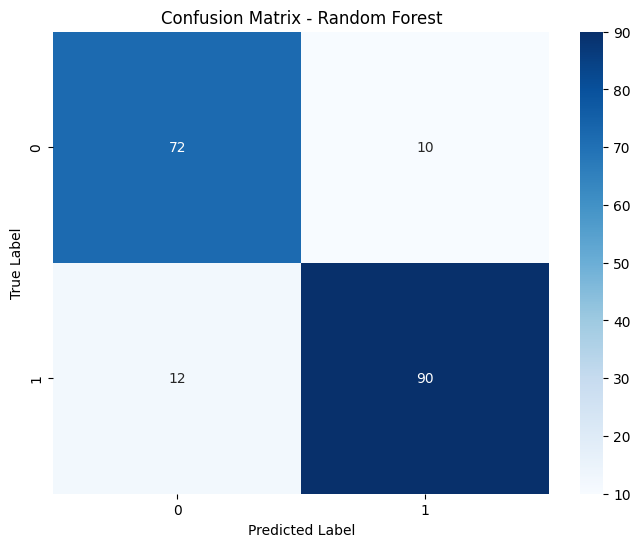

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Tạo mô hình Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plot_confusion_matrix(confusion_matrix(y_test, y_pred), "Random Forest")

In [ ]:
import joblib

# Đường dẫn để lưu mô hình
model_path = "../models/model_predict/heart_failure.pkl"

# Lưu mô hình vào file
joblib.dump(model, model_path)

['../models/predict/Suytim11.pkl']

In [8]:
a = [[49, 1, 2, 160, 180, 0, 0, 156, 0, 1.0, 2]]
b = model.predict(a)
print(b)

[1]


c:\Users\KIKIp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Decisiontree

Decision Tree Results:

Confusion Matrix:
[[71 11]
 [26 76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.79        82
           1       0.87      0.75      0.80       102

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.80       184



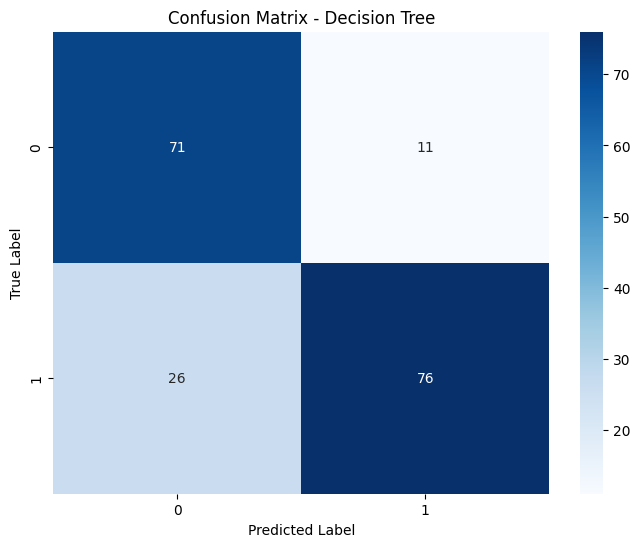

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Tạo mô hình Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
dt_y_pred = dt_model.predict(X_test)

# Đánh giá mô hình
print("Decision Tree Results:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_y_pred))

print("\nClassification Report:")
print(classification_report(y_test, dt_y_pred))

plot_confusion_matrix(confusion_matrix(y_test, dt_y_pred), "Decision Tree")

## KNN

KNN Results:

Confusion Matrix:
[[70 12]
 [12 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        82
           1       0.88      0.88      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



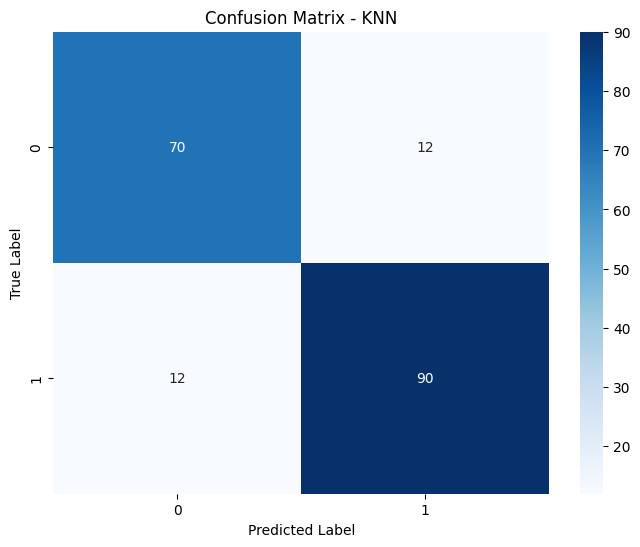

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tạo mô hình KNN với k=5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
knn_y_pred = knn_model.predict(X_test_scaled)

# Đánh giá mô hình
print("KNN Results:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, knn_y_pred))

print("\nClassification Report:")
print(classification_report(y_test, knn_y_pred))

plot_confusion_matrix(confusion_matrix(y_test, knn_y_pred), "KNN")